In [55]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras 

In [4]:
from tensorflow.keras.preprocessing.image import load_img

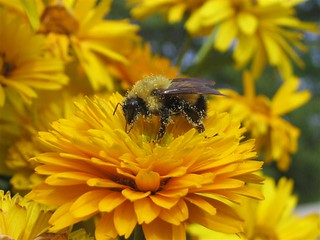

In [7]:
path = 'C:/Users/mulin/data/train/bee'
name = '2984293_b650d46745_n.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

#  convolutional neural networks via transfer learning 

In [25]:
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [34]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(learning_rate=0.02,momentum=0.8),metrics=['acc'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [39]:
train_dir = 'C:/Users/mulin/data/train'
test_dir = 'C:/Users/mulin/data/test'

In [40]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary',shuffle=True)

Found 3677 images belonging to 2 classes.


In [45]:
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary',shuffle=True)

Found 918 images belonging to 2 classes.


In [46]:
history = model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
184/184 [==============================] - 43s 230ms/step - loss: 0.6805 - acc: 0.5779 - val_loss: 0.6467 - val_acc: 0.6176
Epoch 2/10
184/184 [==============================] - 32s 173ms/step - loss: 0.6415 - acc: 0.6157 - val_loss: 0.6004 - val_acc: 0.6558
Epoch 3/10
184/184 [==============================] - 30s 165ms/step - loss: 0.6321 - acc: 0.6345 - val_loss: 0.6208 - val_acc: 0.6275
Epoch 4/10
184/184 [==============================] - 30s 165ms/step - loss: 0.6304 - acc: 0.6206 - val_loss: 0.6213 - val_acc: 0.6525
Epoch 5/10
184/184 [==============================] - 32s 176ms/step - loss: 0.6054 - acc: 0.6595 - val_loss: 0.5992 - val_acc: 0.6405
Epoch 6/10
184/184 [==============================] - 33s 179ms/step - loss: 0.5724 - acc: 0.6900 - val_loss: 0.6188 - val_acc: 0.6786
Epoch 7/10
184/184 [==============================] - 32s 174ms/step - loss: 0.5295 - acc: 0.7338 - val_loss: 0.6069 - val_acc: 0.6580
Epoch 8/10
184/184 [==============================] - 3

In [58]:
history.history

{'loss': [0.6805372834205627,
  0.6414504051208496,
  0.6321107149124146,
  0.6304458975791931,
  0.6053857803344727,
  0.5724445581436157,
  0.5295174717903137,
  0.47027724981307983,
  0.39484673738479614,
  0.30181771516799927],
 'acc': [0.5779168009757996,
  0.6157193183898926,
  0.6344846487045288,
  0.6206146478652954,
  0.6595050096511841,
  0.6899646520614624,
  0.7337503433227539,
  0.7780799269676208,
  0.8237693905830383,
  0.8729943037033081],
 'val_loss': [0.6466782689094543,
  0.6004207134246826,
  0.6208404898643494,
  0.621342122554779,
  0.5991997718811035,
  0.6187748312950134,
  0.6069249510765076,
  0.6415607333183289,
  0.6327849626541138,
  0.7598931193351746],
 'val_acc': [0.6176470518112183,
  0.655773401260376,
  0.6274510025978088,
  0.6525054574012756,
  0.6405228972434998,
  0.6786492466926575,
  0.657952070236206,
  0.6546840667724609,
  0.6633986830711365,
  0.672113299369812]}

In [51]:
accuracy = history.history['acc']

In [57]:
median_accuracy = np.median(accuracy)
median_accuracy

0.6747348308563232

In [59]:
loss  = history.history['loss']

In [60]:
std_loss = np.std(loss)
std_loss

0.11595731133824286

In [62]:
train_datagen = ImageDataGenerator(
           rescale=1./255,
           rotation_range=50,
           width_shift_range=0.1,
           height_shift_range=0.1,
           zoom_range=0.1,
           horizontal_flip=True,
           fill_mode='nearest' )

In [63]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [64]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary',shuffle=True)

Found 3677 images belonging to 2 classes.


In [67]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=32,class_mode='binary',shuffle=True)

Found 918 images belonging to 2 classes.


In [69]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)
     

Epoch 1/10
115/115 [==============================] - 43s 374ms/step - loss: 0.6508 - acc: 0.6135 - val_loss: 0.6126 - val_acc: 0.6514
Epoch 2/10
115/115 [==============================] - 41s 356ms/step - loss: 0.6069 - acc: 0.6552 - val_loss: 0.5678 - val_acc: 0.7070
Epoch 3/10
115/115 [==============================] - 44s 380ms/step - loss: 0.5985 - acc: 0.6622 - val_loss: 0.5727 - val_acc: 0.7092
Epoch 4/10
115/115 [==============================] - 45s 388ms/step - loss: 0.5773 - acc: 0.7003 - val_loss: 0.5340 - val_acc: 0.7473
Epoch 5/10
115/115 [==============================] - 48s 418ms/step - loss: 0.5749 - acc: 0.7049 - val_loss: 0.5585 - val_acc: 0.6906
Epoch 6/10
115/115 [==============================] - 44s 380ms/step - loss: 0.5504 - acc: 0.7221 - val_loss: 0.5494 - val_acc: 0.7081
Epoch 7/10
115/115 [==============================] - 42s 366ms/step - loss: 0.5253 - acc: 0.7495 - val_loss: 0.5516 - val_acc: 0.7288
Epoch 8/10
115/115 [==============================] - 4

In [72]:
history.history

{'loss': [0.6508458256721497,
  0.606942355632782,
  0.5984988808631897,
  0.5773104429244995,
  0.5749132037162781,
  0.5504064559936523,
  0.5253321528434753,
  0.5127975344657898,
  0.49975210428237915,
  0.4831637144088745],
 'acc': [0.6135436296463013,
  0.6551536321640015,
  0.6622246503829956,
  0.7002991437911987,
  0.7049224972724915,
  0.7220560312271118,
  0.7495240569114685,
  0.7691052556037903,
  0.7663856148719788,
  0.781887412071228],
 'val_loss': [0.6126478314399719,
  0.5678390860557556,
  0.5726637244224548,
  0.5340255498886108,
  0.5585119724273682,
  0.5493934750556946,
  0.5516073107719421,
  0.510951817035675,
  0.48739850521087646,
  0.49734237790107727],
 'val_acc': [0.6514161229133606,
  0.7069717049598694,
  0.7091503143310547,
  0.7472766637802124,
  0.6906318068504333,
  0.7080609798431396,
  0.7287581562995911,
  0.7668845057487488,
  0.7810457348823547,
  0.7679738402366638]}

In [73]:
val_loss_aug = history.history['val_loss']
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.5442381650209427

In [74]:
val_acc_aug = history.history['val_acc']

In [75]:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug 

0.7505446434020996